In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import random

def mandelbrot(x, y):
    z = c = complex(x, y)
    iteration = 0
    max_iteration = 511  # arbitrary cutoff
    while abs(z) < 2 and iteration < max_iteration:
        z = z * z + c
        iteration += 1
    return iteration

def sum_values_for_partitions(rdd):
    'Returns (as an RDD) the sum of V for each partition of a (K, V) RDD'
    # note that the function passed to mapPartitions should return a sequence,
    # not a value.
    return rdd.mapPartitions(lambda part: [sum(V for K, V in part)])

def draw_image(rdd):
    '''Given a (K, V) RDD with K = (I, J) and V = count,
    display an image of count at each I, J'''

    data = rdd.collect()
    I = np.array([d[0][0] for d in data])
    J = np.array([d[0][1] for d in data])
    C = np.array([d[1] for d in data])
    im = np.zeros((I.max() + 1, J.max() + 1))
    im[I, J] = np.log(C + 1)  # log intensity makes it easier to see levels
    plt.imshow(im, cmap=cm.gray)
    plt.show()


In [3]:
pixel = range(2000)

In [4]:
pix1D=sc.parallelize(pixel,10)

In [5]:
pixels = pix1D.cartesian(pix1D)

In [6]:
mandrdd = pixels.map(lambda i: (i, mandelbrot((i[1]/500.)-2,(i[0]/500.0)-2)))

In [7]:
mandrdd.take(3)

[((0, 0), 0), ((0, 1), 0), ((0, 2), 0)]

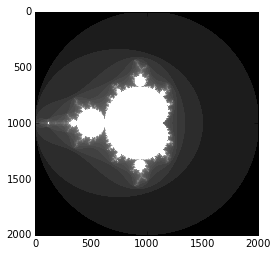

In [8]:
draw_image(mandrdd)

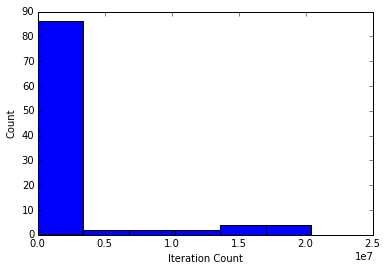

In [23]:
plt.hist(sum_values_for_partitions(mandrdd).collect(),bins=6)
plt.xlabel("Iteration Count")
plt.ylabel("Count")
plt.savefig("P2a_hist.png")

In [12]:
mandrdd2 = pixels.map(lambda i: (i, mandelbrot((i[1]/500.)-2,(i[0]/500.0)-2))).repartition(100)
#mandrdd2 = pixels.map(lambda i: (i, mandelbrot((i[1]/500.)-2,(i[0]/500.0)-2))).partitionBy(100, lambda x: random.randrange(0,100,1))

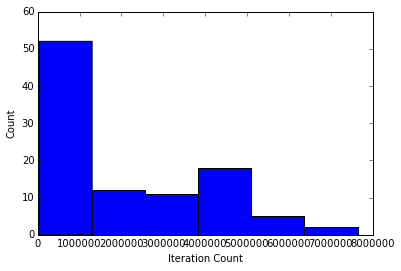

In [22]:
plt.hist(sum_values_for_partitions(mandrdd2).collect(),bins=6)
plt.xlabel("Iteration Count")
plt.ylabel("Count")
plt.savefig("P2b_hist.png")

In [ ]:
sorted(pixels.partitionBy(100).glom().collect()[0], key= lambda x: x[0])